In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('dataset/train.csv')

In [4]:
data=np.array(data)
m,n= data.shape
np.random.shuffle(data)

data_dev= data[0:1000].T
X_dev= data_dev[1:1000]
Y_dev=data_dev[0]
X_dev= X_dev/255.0


data_train= data[1000:m].T
X_train= data_train[1:n]
Y_train=data_train[0]
X_train= X_train/255.0

In [5]:
def init_params(layers):
        ws, bs = [], []  
        for i in range(1, len(layers)):     
            w = np.random.randn(layers[i], layers[i-1]) * np.sqrt(2 / layers[i-1])  
            b = np.zeros((layers[i], 1))        
            ws.append(w)       
            bs.append(b)    
        
        return ws, bs

Activations

In [6]:
def relu(z):
    return np.maximum(0, z)

def relu_der(z):
    return z > 0

def softmax(z):
    exp = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp / np.sum(exp, axis=0, keepdims=True)


Forward Propagation

In [7]:
def forward_prop(ws, bs, X):
    Zs, As = [], [X]

    for i in range(len(ws)-1):
        z = ws[i].dot(As[i]) + bs[i]
        Zs.append(z)
        As.append(relu(z))

    z = ws[-1].dot(As[-1]) + bs[-1]
    Zs.append(z)
    As.append(softmax(z))

    return Zs, As


Backward Propagation

In [8]:
def one_hot(Y):
    onehot = np.zeros((Y.max()+1, Y.size))
    onehot[Y, np.arange(Y.size)] = 1
    return onehot

def backward_prop(ws, Zs, As, Y):
    m = Y.size
    dWs, dBs = [], []

    Y_oh = one_hot(Y)
    dZ = As[-1] - Y_oh   # (classes, m)

    for i in reversed(range(len(ws))):
        A_prev = As[i]   

        dW = (1/m) * dZ @ A_prev.T
        dB = (1/m) * np.sum(dZ, axis=1, keepdims=True)

        dWs.insert(0, dW)
        dBs.insert(0, dB)

        if i != 0:
            dZ = ws[i].T @ dZ * relu_der(Zs[i-1])

    return dWs, dBs


Update Parameters

In [9]:
def update_params(ws, bs, dWs, dBs, lr):
    for i in range(len(ws)):
        ws[i] = ws[i]- lr * dWs[i]
        bs[i] -= lr * dBs[i]
    return ws, bs


prediction


In [15]:
def get_predictions(A):
    return np.argmax(A, axis=0)

def accuracy(preds, Y):
    print(preds, Y)
    return np.sum(preds == Y_train) / Y_train.size


def gradient_descent(X, Y, layers, lr, iterations):
    ws, bs = init_params(layers)

    for i in range(iterations):
        Zs, As = forward_prop(ws, bs, X)
        dWs, dBs = backward_prop(ws, Zs, As, Y)
        ws, bs = update_params(ws, bs, dWs, dBs, lr)

        if i % 50 == 0:
            preds = get_predictions(As[-1])
            print(f"Iter {i} | Acc:", accuracy(preds, Y))

    return ws, bs



In [17]:
layers = [784, 128, 64, 32, 10]

ws,bs= gradient_descent(X_train,Y_train,layers,0.01,1000)

[7 7 7 ... 4 7 4] [4 6 1 ... 0 3 8]
Iter 0 | Acc: 0.10648780487804878
[4 3 5 ... 7 3 8] [4 6 1 ... 0 3 8]
Iter 50 | Acc: 0.3023170731707317
[4 6 0 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 100 | Acc: 0.4945609756097561
[4 6 0 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 150 | Acc: 0.6508048780487805
[4 6 7 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 200 | Acc: 0.7582926829268293
[4 6 7 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 250 | Acc: 0.8009268292682927
[4 6 7 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 300 | Acc: 0.8234878048780487
[4 6 7 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 350 | Acc: 0.8382682926829268
[4 6 7 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 400 | Acc: 0.8502682926829268
[4 6 7 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 450 | Acc: 0.8592926829268293
[4 6 7 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 500 | Acc: 0.866390243902439
[4 6 7 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 550 | Acc: 0.8734878048780488
[4 6 3 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 600 | Acc: 0.8788536585365854
[4 6 3 ... 0 3 8] [4 6 1 ... 0 3 8]
Iter 650 | Acc: 0.8834390243902439
[4 6 3 ..

In [21]:
def make_predictions(X, ws, bs):
    _, As = forward_prop(ws, bs, X)
    predictions = np.argmax(As[-1], axis=0)
    return predictions

def test_prediction(index, X, Y, ws, bs):
    x = X[:, index:index+1]         
    prediction = make_predictions(x, ws, bs)[0]
    label = Y[index]

    print("Prediction:", prediction)
    print("Label:", label)

    image = x.reshape(28, 28) * 255
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()

Prediction: 4
Label: 4


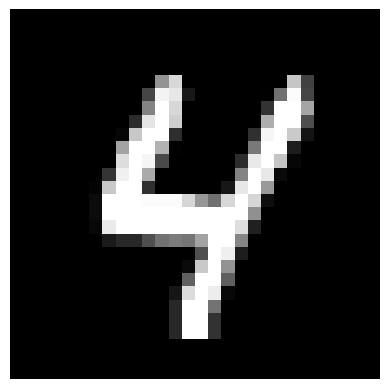

Prediction: 6
Label: 6


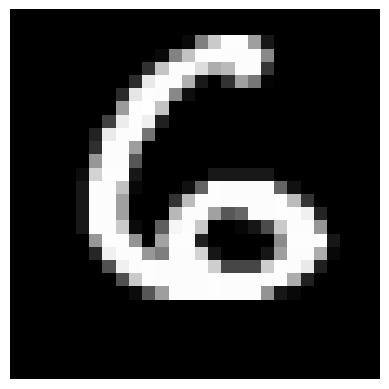

Prediction: 3
Label: 1


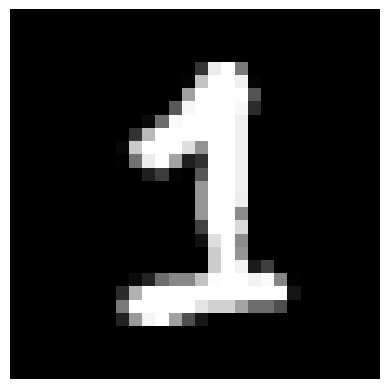

Prediction: 7
Label: 7


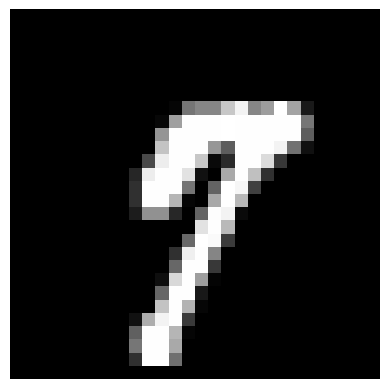

Prediction: 9
Label: 9


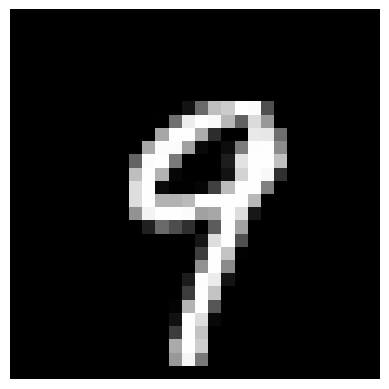

Prediction: 0
Label: 0


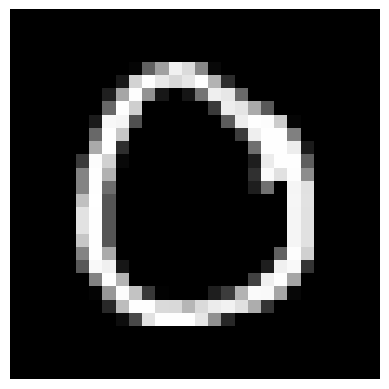

In [23]:
test_prediction(0, X_train, Y_train, ws, bs)
test_prediction(1, X_train, Y_train, ws, bs)
test_prediction(2, X_train, Y_train, ws, bs)
test_prediction(3, X_train, Y_train, ws, bs)
test_prediction(9, X_train, Y_train, ws, bs)
test_prediction(8, X_train, Y_train, ws, bs)
